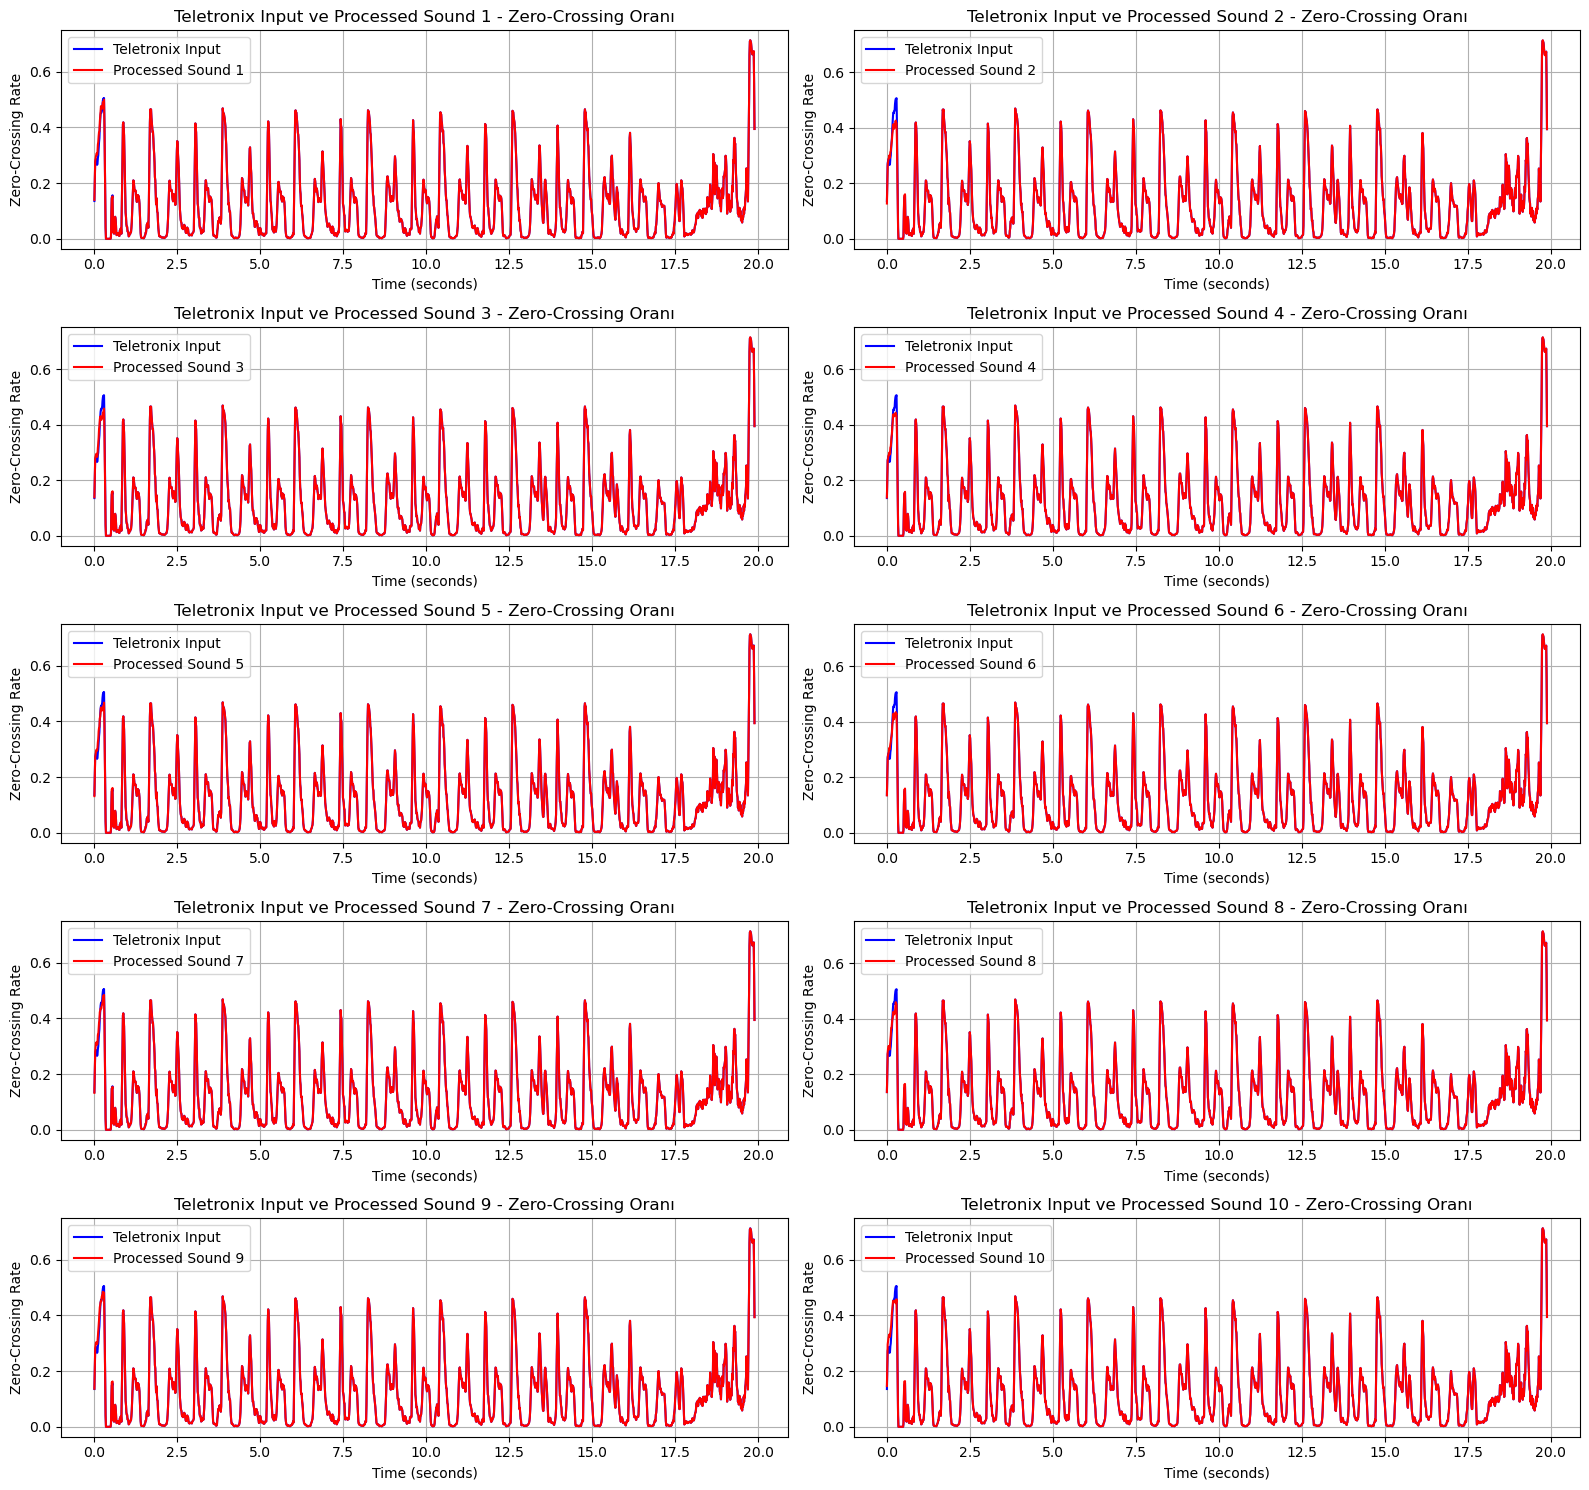

In [16]:
# Librosa sisteminin aktarılması

import matplotlib.pyplot as plt # Grafik ve görselleştirme işlemleri için Matplotlib kütüphanesini yükler.
import numpy as np # Bilimsel hesaplama ve dizi işlemleri için NumPy kütüphanesini yükler.
import librosa # Ses işleme ve analiz için Librosa kütüphanesini yükler.
import librosa.display # Librosa’nın ses grafikleri çizme fonksiyonlarını yükler.
import pyloudnorm as pyln  # LUFS analizini yapar.
import IPython.display as ipd # Ses dosyalarını Jupyter'da çalmak için gerekli IPython fonksiyonlarını yükler.
from IPython.display import Audio, display  # Ses dosyalarını Jupyter hücresinde oynatmaya olanak tanır.

# Ses dosyalarının yollarını bir listeye ekleme
audio_files = [
    "/Users/nazimerensahin/Desktop/fldr/teletro.wav", 
    "/Users/nazimerensahin/Desktop/fldr/22.wav",      
    "/Users/nazimerensahin/Desktop/fldr/33.wav",
    "/Users/nazimerensahin/Desktop/fldr/44.wav",
    "/Users/nazimerensahin/Desktop/fldr/55.wav",
    "/Users/nazimerensahin/Desktop/fldr/66.wav",
    "/Users/nazimerensahin/Desktop/fldr/77.wav",
    "/Users/nazimerensahin/Desktop/fldr/88.wav",
    "/Users/nazimerensahin/Desktop/fldr/99.wav",
    "/Users/nazimerensahin/Desktop/fldr/1010.wav",
    "/Users/nazimerensahin/Desktop/fldr/1111.wav",
]

# Her dosya için açıklayıcı isimler ekleme
audio_labels = [
    "Teletronix Input",
    "Processed Sound 1",
    "Processed Sound 2",
    "Processed Sound 3",
    "Processed Sound 4",
    "Processed Sound 5",
    "Processed Sound 6",
    "Processed Sound 7",
    "Processed Sound 8",
    "Processed Sound 9",
    "Processed Sound 10",
]

# İlk ses dosyasını yükleme (referans)
sound1, sr1 = librosa.load(audio_files[0], sr=None)
zcr_sound1 = librosa.feature.zero_crossing_rate(sound1)[0]
t_sound1 = librosa.times_like(zcr_sound1, sr=sr1)

# Alt grafik sayısını belirleme
num_files = len(audio_files) - 1  # İlk dosya dışındaki dosyalar
rows = (num_files + 1) // 2  # İkili sütun düzeni için satır sayısı

# Grafik oluşturma
fig, axes = plt.subplots(rows, 2, figsize=(16, 3 * rows))
axes = axes.flatten()

# Ses dosyalarını karşılaştırma
for idx, file_path in enumerate(audio_files[1:], start=1):  # İlk dosya haricindeki dosyalar
    sound_i, sr_i = librosa.load(file_path, sr=None)
    zcr_sound_i = librosa.feature.zero_crossing_rate(sound_i)[0]
    t_sound_i = librosa.times_like(zcr_sound_i, sr=sr_i)

    # Alt grafik oluşturma
    axes[idx - 1].plot(t_sound1, zcr_sound1, color="blue", label=audio_labels[0])
    axes[idx - 1].plot(t_sound_i, zcr_sound_i, color="red", label=audio_labels[idx])
    axes[idx - 1].set_title(f"{audio_labels[0]} ve {audio_labels[idx]} - Zero-Crossing Oranı")
    axes[idx - 1].set_xlabel("Time (seconds)")
    axes[idx - 1].set_ylabel("Zero-Crossing Rate")
    axes[idx - 1].legend()
    axes[idx - 1].grid()

# Kullanılmayan alt grafiklerin gizlenmesi
for idx in range(num_files, len(axes)):
    fig.delaxes(axes[idx])

# Tüm grafikleri düzenleme ve gösterme
plt.tight_layout()
plt.show()